## Yellow Taxi Trip Data

The purpose of this project is to look at the yellow taxi trip records, in order to investigate passenger’s behavior. This analysis will help the taxi drivers as well as the company to know when the best time to serve and when to reduce or avoid serving. 


First of all, lets import & connect the database. 

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import sqlite3 as sql
import datetime as dt
sns.set()

In [2]:
#create connection to database file & the first 5 rows
database = r"C:\Users\win10\Desktop\yellow_tripdata.db"
connect  = sql.connect(database)
query = '''select * from yellow_tripdata'''
df = pd.read_sql_query(query, connect)
df.head()

,VendorID,tpep_pickup_datetime,time_pickup,tpep_dropoff_datetime,time_dropoff,passenger_count,trip_distance,RatecodeID8,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2/1/2021 0:40,0:40,2/1/2021 0:48,0:48,1,2.30,1,N,141,226,2,8.5,3.0,0.5,0.00,0.0,0.3,12.30,2.5
1,1,2/1/2021 0:07,0:07,2/1/2021 0:20,0:20,1,1.60,1,N,43,263,2,9.5,3.0,0.5,0.00,0.0,0.3,13.30,0.0
2,1,2/1/2021 0:59,0:59,2/1/2021 1:24,1:24,1,5.30,1,N,114,263,2,19.0,3.0,0.5,0.00,0.0,0.3,22.80,2.5
3,2,2/1/2021 0:03,0:03,2/1/2021 0:16,0:16,1,2.79,1,N,236,229,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
4,2,2/1/2021 0:20,0:20,2/1/2021 0:24,0:24,2,0.64,1,N,229,140,1,4.5,0.5,0.5,1.66,0.0,0.3,9.96,2.5


### Exploring the Dataset

The data looks just like as it wanted. We can easily tell just by looking at the dataset that it contains data about different times, locations, distance, and their tip amount as well as total amount. 

In [3]:
#shape of the dataset
df.shape

(1048575, 20)

In [4]:
#check the columns
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'time_pickup',
       'tpep_dropoff_datetime', 'time_dropoff', 'passenger_count',
       'trip_distance', 'RatecodeID8', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

In [5]:
#check datatypes of all these columns.
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
time_pickup               object
tpep_dropoff_datetime     object
time_dropoff              object
passenger_count            int64
trip_distance            float64
RatecodeID8                int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
#check for duplication
print(df.duplicated())

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool


as we can see above there are no duplications.

next, let's check for missing values in the dataset.

In [7]:
#check for missing values
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
time_pickup              0
tpep_dropoff_datetime    0
time_dropoff             0
passenger_count          0
trip_distance            0
RatecodeID8              0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

Fortunately, there are no missing values in this dataset

In [8]:
# check for unique values of all columns
df.nunique()

VendorID                     2
tpep_pickup_datetime     32423
time_pickup               1440
tpep_dropoff_datetime    32540
time_dropoff              1440
passenger_count              9
trip_distance             3349
RatecodeID8                  7
store_and_fwd_flag           2
PULocationID               258
DOLocationID               260
payment_type                 4
fare_amount               1051
extra                       15
mta_tax                      6
tip_amount                1894
tolls_amount               225
improvement_surcharge        3
total_amount              5649
congestion_surcharge         7
dtype: int64

### Feature Enhancement
making some new features out of the existing variables so that we can get more information out of the data.
converting the datetime

In [9]:
#converting the datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_pickup_datetime'].dt.day_name()
df['pickup_day_no']=df['tpep_pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['tpep_pickup_datetime'].dt.weekday
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_pickup_datetime'].dt.hour
df['pickup_month']=df['tpep_pickup_datetime'].dt.month
df['dropoff_month']=df['tpep_pickup_datetime'].dt.month

next, let's use this function to figure out what time of day the ride was taken.

In [10]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [11]:
#create new columns in the dataset.
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [12]:
#Passenger count
df.passenger_count.value_counts()

1    797423
2    135575
3     34200
5     27628
0     21569
6     19334
4     12843
7         2
9         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

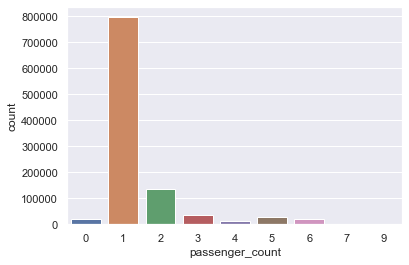

In [13]:
sns.countplot(x='passenger_count',data=df)

there are some trips with 0 passengers
and for 7 & 9 there are few ones 

### cleaning data
in this part will clean the fllowing data

-remove the rows which have 0 or 7 or 9 passenger count.

-since there are some columns that are not needed in this analysis, such as store_and_fwd_flag, mta_tax, tolls_amount. it shall be cleaned.

In [14]:
#remove some data
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [15]:
df.passenger_count.value_counts()

1    797423
2    135575
3     34200
5     27628
6     19334
4     12843
Name: passenger_count, dtype: int64

In [16]:
#drop columns
df.drop('store_and_fwd_flag', axis=1, inplace=True)
df.head(1)

,VendorID,tpep_pickup_datetime,time_pickup,tpep_dropoff_datetime,time_dropoff,passenger_count,trip_distance,RatecodeID8,PULocationID,DOLocationID,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,1,2021-02-01 00:40:00,0:40,2/1/2021 0:48,0:48,1,2.3,1,141,226,...,Monday,Monday,0,0,0,0,2,2,Late night,Late night


In [17]:
#drop columns
df.drop('mta_tax', axis=1, inplace=True)
df.head(1)

,VendorID,tpep_pickup_datetime,time_pickup,tpep_dropoff_datetime,time_dropoff,passenger_count,trip_distance,RatecodeID8,PULocationID,DOLocationID,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,1,2021-02-01 00:40:00,0:40,2/1/2021 0:48,0:48,1,2.3,1,141,226,...,Monday,Monday,0,0,0,0,2,2,Late night,Late night


In [18]:
#drop columns
df.drop('tolls_amount', axis=1, inplace=True)
df.head(1)

,VendorID,tpep_pickup_datetime,time_pickup,tpep_dropoff_datetime,time_dropoff,passenger_count,trip_distance,RatecodeID8,PULocationID,DOLocationID,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,1,2021-02-01 00:40:00,0:40,2/1/2021 0:48,0:48,1,2.3,1,141,226,...,Monday,Monday,0,0,0,0,2,2,Late night,Late night


### Tips per hours

<AxesSubplot:xlabel='dropoff_hour', ylabel='tip_amount'>

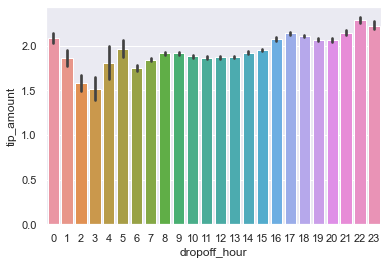

In [19]:
sns.barplot(y='tip_amount',x='dropoff_hour',data=df)

passenger give the most tips between 10 pm & 12 pm. 
passenger give the least tips after midnight with peak early morning 

### Per Day Trips

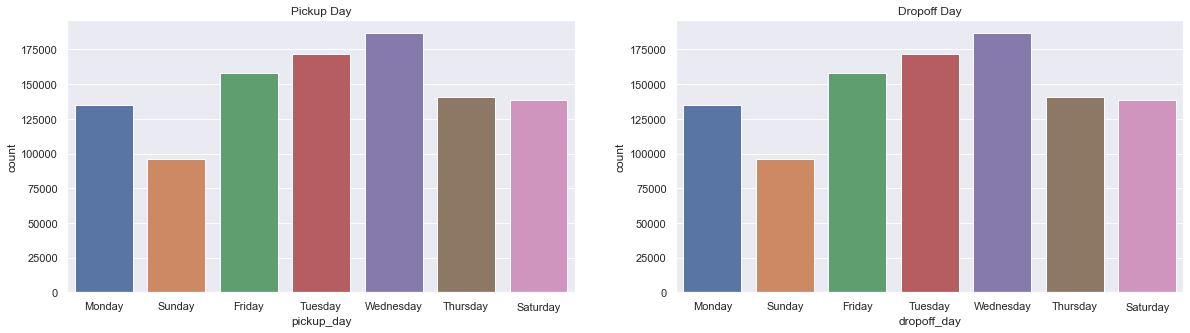

In [20]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Day')
ax=sns.countplot(x='pickup_day',data=df,ax=ax1)
ax2.set_title('Dropoff Day')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

There are high demand on Friday, Tuesday, and Wednesday

### Per hours Trips

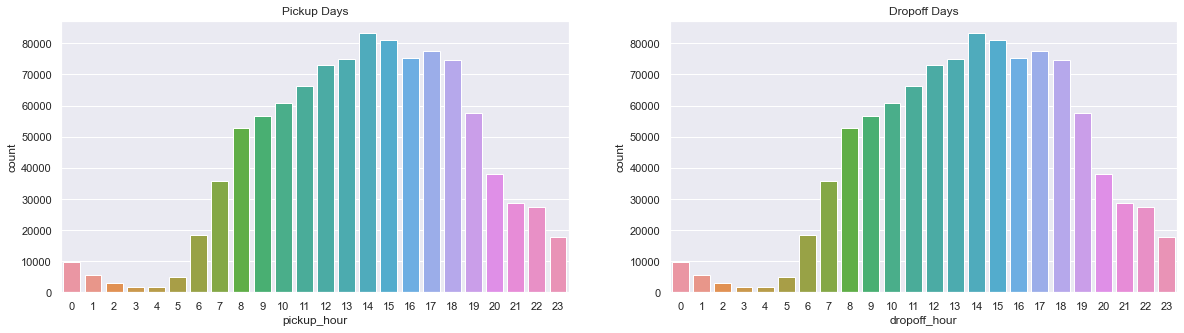

In [21]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

1 pm to 2pm ther are busiest hours

### Trips based on the time of day

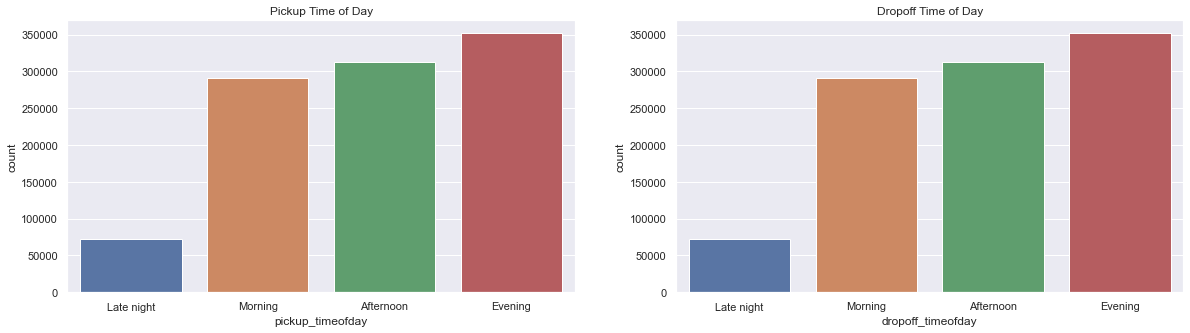

In [22]:
igure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

Evening has the highest demand

### Doing some query

In [24]:
#selecting all columns
query = '''select * from yellow_tripdata
where passenger_count > 2'''
df2 = pd.read_sql_query(query, connect)
df2.head()

,VendorID,tpep_pickup_datetime,time_pickup,tpep_dropoff_datetime,time_dropoff,passenger_count,trip_distance,RatecodeID8,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2/1/2021 0:52,0:52,2/1/2021 1:16,1:16,4,6.07,1,N,249,181,1,21.0,0.5,0.5,6.20,0.00,0.3,31.00,2.5
1,2,2/1/2021 0:15,0:15,2/1/2021 0:27,0:27,3,2.73,1,N,186,237,1,10.0,0.5,0.5,4.14,0.00,0.3,17.94,2.5
2,2,2/5/2021 0:04,0:04,2/5/2021 0:22,0:22,5,7.15,1,N,161,36,1,22.5,0.5,0.5,9.73,6.12,0.3,42.15,2.5
3,2,2/1/2021 0:38,0:38,2/1/2021 0:53,0:53,6,4.27,1,N,263,68,2,14.5,0.5,0.5,0.00,0.00,0.3,18.30,2.5
4,2,1/31/2021 23:57,23:57,2/1/2021 0:02,0:02,6,1.44,1,N,158,100,1,6.5,0.5,0.5,2.58,0.00,0.3,12.88,2.5


In [25]:
#average tip amount
query = '''SELECT payment_type, AVG(tip_amount) as avg_amount
FROM yellow_tripdata
 where payment_type == 1
GROUP BY payment_type;'''
df3 = pd.read_sql_query(query, connect)
df3.head()

,payment_type,avg_amount
0,1,2.65314


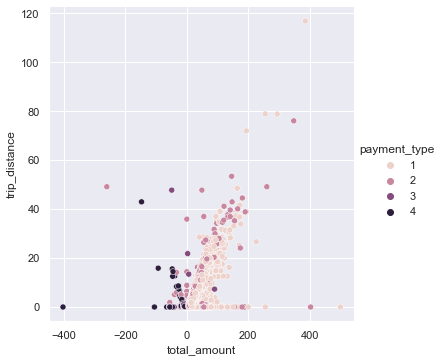

In [26]:
sns.relplot(x='total_amount', y='trip_distance', hue='payment_type', data=df2)

1= Credit card 2= Cash 3 = No charge 4 = Dispute
this show the near distance the more dispute

### Conclusion
Most of the rides are on Friday, Tuesday, and Wednesday
Most rides are taken in the evening time
passenger give the most tips between 10 pm & 12 pm. 
passenger give the least tips after midnight with peak early morning
this show the near distance the more dispute